## Table of contents

- [Setup](#Setup)
  - [Split the data](#Split-the-data)
  - [Normalize the data](#Normalize-the-data)
- [Data windowing](#Data-windowing)
  - [Split](#Split)
  - [Plot](#Plot)
  - [Create tf.data.Datasets](#Create-tf.data.Datasets)
- [Single step models](#Single-step-models)
  - [Baseline](#Baseline)
  - [Linear model](#Linear-model)
  - [Dense](#Dense)
  - [Multi-step dense](#Multi-step-dense)
  - [Convolution neural network (CNN)](#Convolution-neural-network-(CNN))
  - [Recurrent neural network (RNN)](#Recurrent-neural-network-(RNN))
  - [Performance](#Performance)
  - [Multi-output models](#Multi-output-models)
    - [Baseline](#Baseline)
    - [Dense](#Dense)
    - [RNN](#RNN)
    - [Advanced: Residual connections](#Advanced:-Residual-connections)
    - [Performance-2](#Performance-2)
- [Multi-step models](#Multi-step-models)
  - [Baselines](#Baselines)
  - [Single-shot models](#Single-shot-models)
    - [Linear](#Linear)
    - [Dense-2](#Dense-2)
    - [CNN](#CNN)
    - [RNN-2](#RNN-2)
  - [Advanced: Autoregressive model](#Advanced:-Autoregressive-model)
    - [RNN-3](#RNN-3)
  - [Performance-3](#Performance-3)

# Setup

In [3]:
# импортируем всё, что понадобится
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [4]:
# импортируем датасет
df = pd.read_csv('day.csv')
#df.head()

In [5]:
#df = df.loc[:,['dteday','workingday','weathersit','temp','windspeed','cnt']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df = df.set_index('dteday')
df.index = pd.to_datetime(df.index,unit='ns')
print(df.index)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)


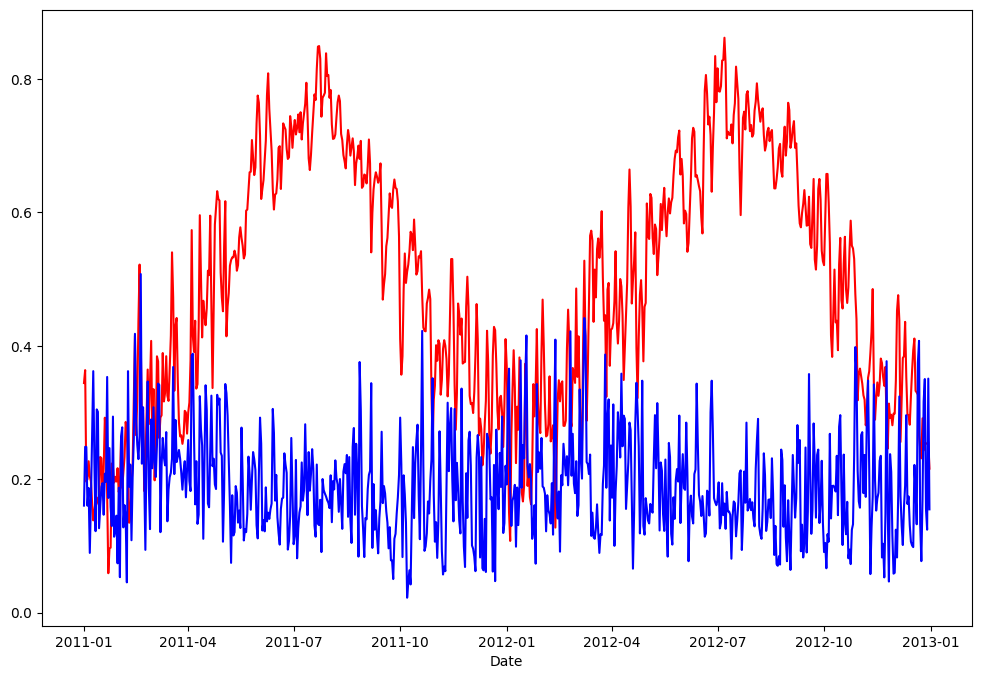

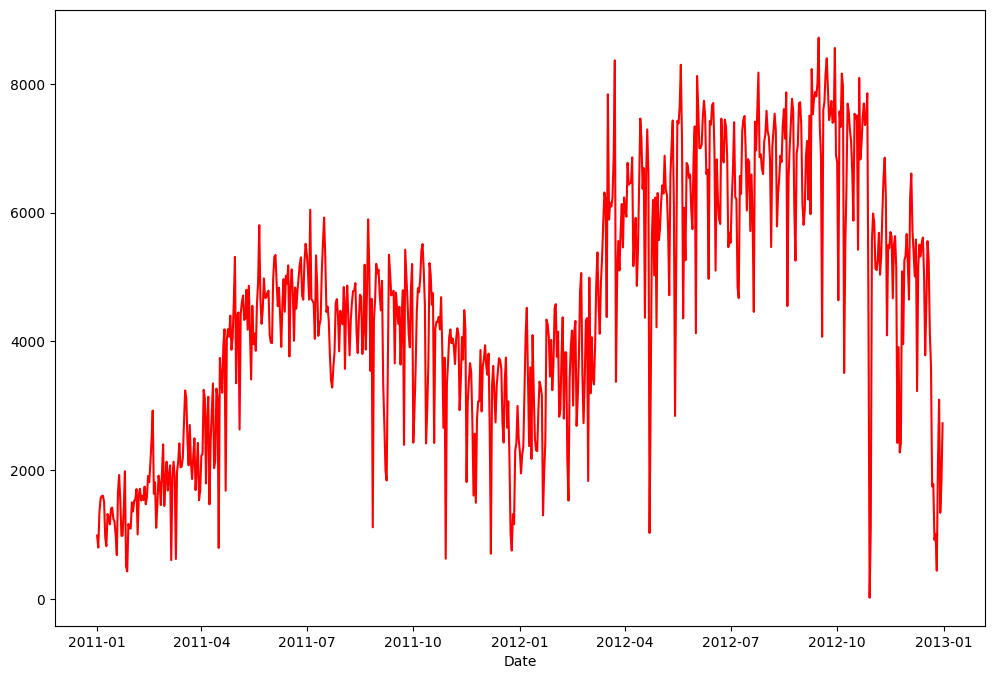

In [7]:
# temp vs windspeed #
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(df.index, df['temp'], 'r-', label='temp')
ax1.plot(df.index, df['windspeed'], 'b-', label='windspeed')
ax1.set_xlabel('Date')
plt.show()

# cnt #
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(df.index, df['cnt'], 'r-', label='cnt')
ax1.set_xlabel('Date')
plt.show()

In [8]:
# статистика набора данных
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


## Split the data

 разделение (70%, 20%, 10%) для обучающих, проверочных и тестовых наборов

In [9]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

## Normalize the data

Перед обучением нейронной сети важно масштабировать функции. Нормализация — это распространенный способ масштабирования: вычесть среднее значение и разделить на стандартное отклонение каждого признака.

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

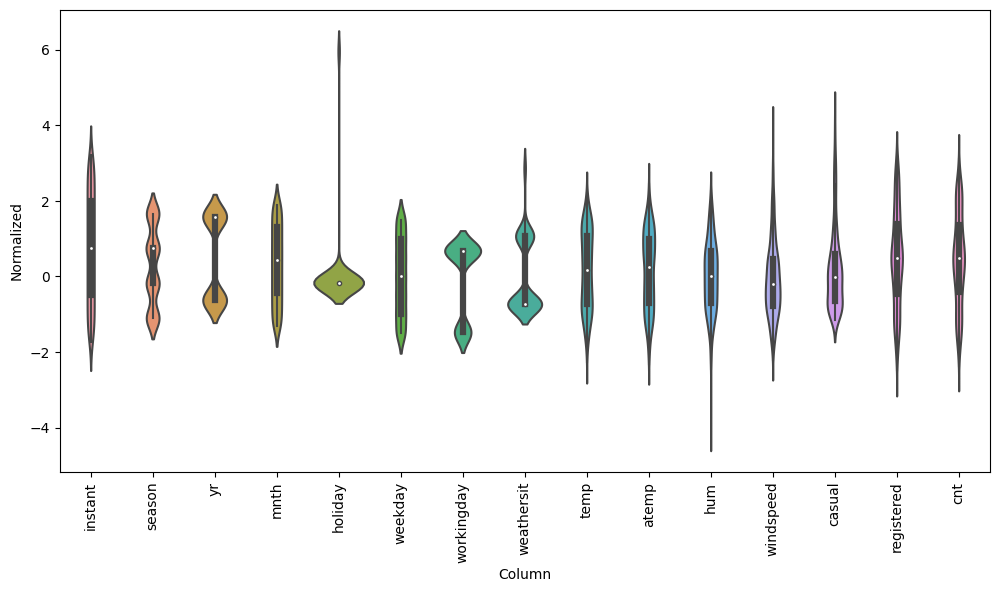

In [11]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data windowing

In [13]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

модель, которая сделает один прогноз на 24 дня вперед, учитывая 24-дневную историю

In [14]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['cnt'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['cnt']

модель, которая делает прогноз на один день вперед, учитывая шесть дней истории

In [15]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['cnt'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['cnt']

## Split

Учитывая список последовательных входных данных, метод split_window преобразует их в окно входных данных и окно меток.

In [16]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [17]:
# Стек три куска, длина всего окна.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 15)
Inputs shape: (3, 6, 15)
Labels shape: (3, 1, 1)


## Plot
метод построения графика, который позволяет легко визуализировать разделенное окно

In [18]:
w2.example = example_inputs, example_labels

In [19]:
def plot(self, model=None, plot_col='cnt', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('day')

WindowGenerator.plot = plot

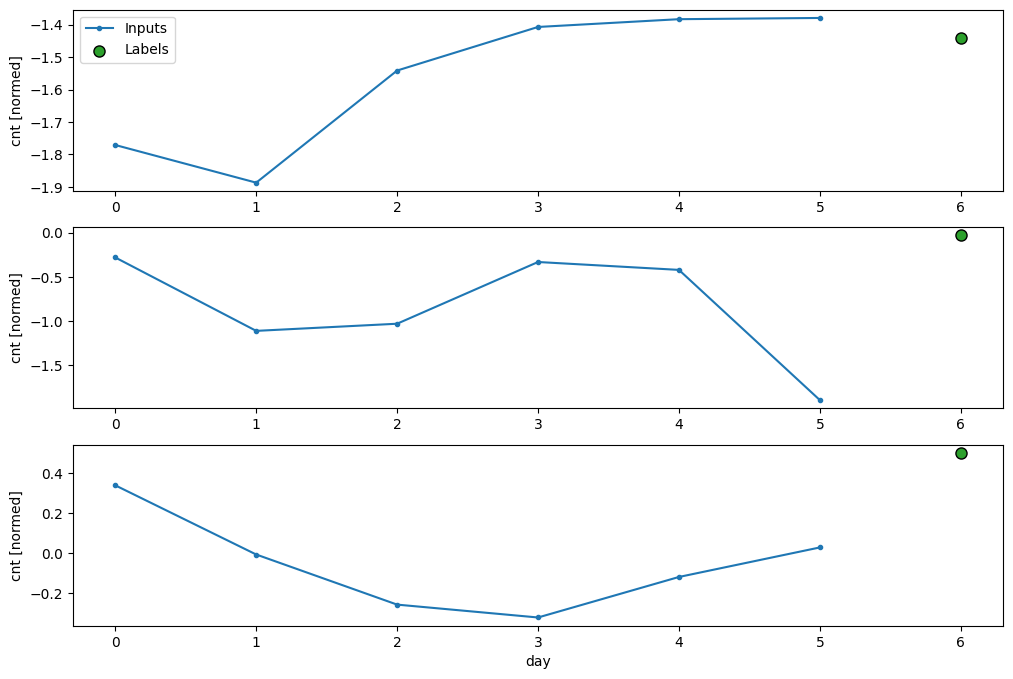

In [20]:
w2.plot()

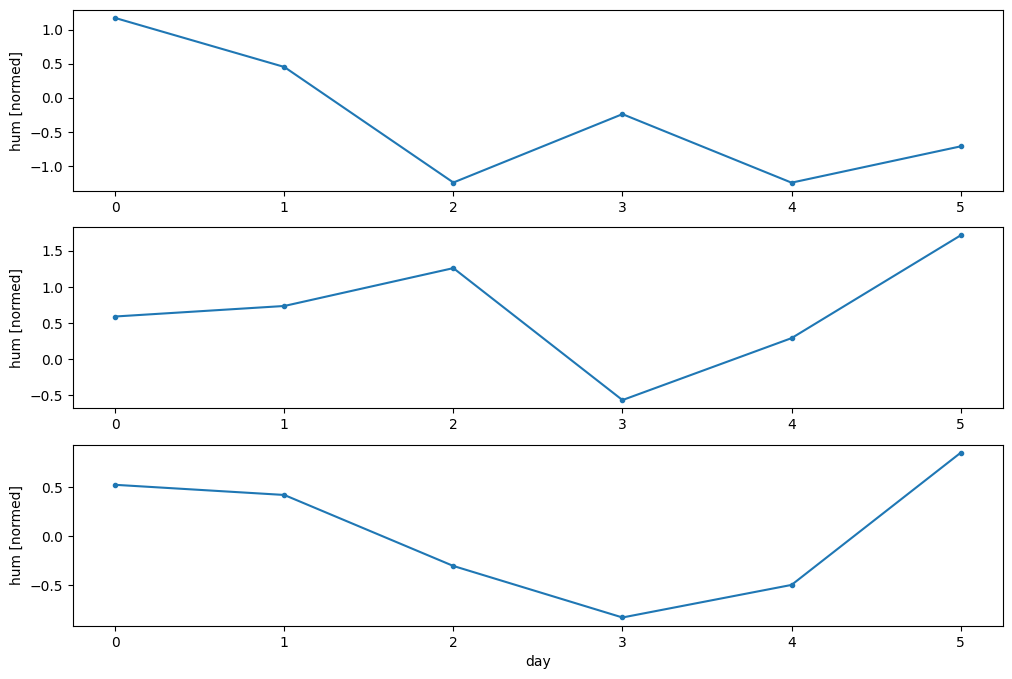

In [21]:
# пример для другого столбца
w2.plot(plot_col='hum')

## Create tf.data.Datasets

Наконец, этот метод make_dataset возьмет временной ряд DataFrame и преобразует его в tf.data.Dataset из пар (input_window, label_window) с помощью функции tf.keras.utils.timeseries_dataset_from_array

In [22]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [23]:
# свойство для доступа к обучающим данным
@property
def train(self):
  return self.make_dataset(self.train_df)

# свойство для доступа к проверочным данным
@property
def val(self):
  return self.make_dataset(self.val_df)

# свойство для доступа к тестовым данным
@property
def test(self):
  return self.make_dataset(self.test_df)

# стандартный пакет примеров для быстрого доступа и построения графиков
@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [24]:
# Каждый элемент представляет собой пару (входы, метка).
w2.train.element_spec

(TensorSpec(shape=(None, 6, 15), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [25]:
# Итерация по Dataset дает конкретные партии
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 15)
Labels shape (batch, time, features): (32, 1, 1)


# Single step models

Самая простая модель, которую можно построить на такого рода данных, — это модель, которая предсказывает значение одной функции — 1 временной шаг в будущее, основываясь только на текущих условиях

In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['cnt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['cnt']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 15)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

базовый уровень производительности в качестве точки для сравнения с более поздними более сложными моделями*

Модели, которая просто возвращает текущее количество в качестве прогноза, прогнозируя «без изменений». 
Это разумная Baseline, поскольку количество изменяется медленно. 
Конечно, эта Baseline будет работать хуже, если сделаетm прогноз в будущем

In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [29]:
baseline = Baseline(label_index=column_indices['cnt'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.5321 - mean_absolute_error: 0.4935


In [30]:
# генерирует окно в 24 дня последовательных входных данных и меток за раз
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['cnt'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['cnt']

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


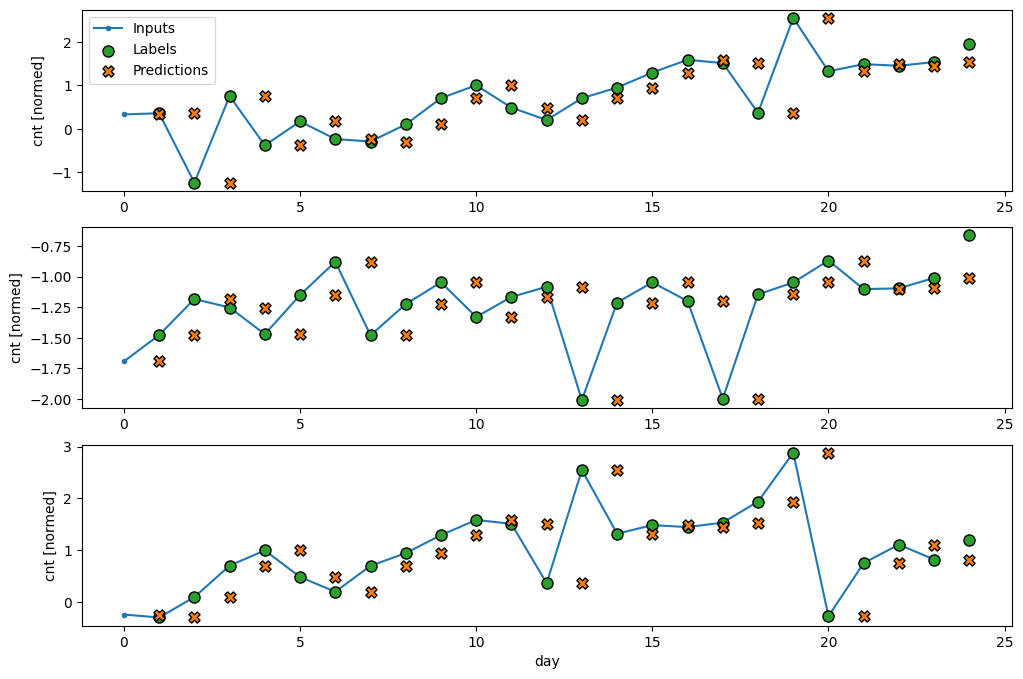

In [32]:
wide_window.plot(baseline)

## Linear model

Самая простая обучаемая модель, которую можно применить к этой задаче, — это вставить линейное преобразование между входом и выходом. В этом случае результат временного шага зависит только от этого шага

Слой tf.keras.layers.Dense без набора activation является линейной моделью. Слой преобразует только последнюю ось данных из (batch, time, inputs) в (batch, time, units) ; он применяется независимо к каждому элементу по осям batch и time

In [33]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 15)
Output shape: (32, 1, 1)


In [34]:
# обучается множество моделей, поэтому упакуйте процедуру обучения в функцию

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [35]:
# Обучение модели и оценка ее производительность
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.8144 - mean_absolute_error: 1.4093 - val_loss: 4.2923 - val_mean_absolute_error: 1.8573
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 2.6010 - mean_absolute_error: 1.3515 - val_loss: 3.7064 - val_mean_absolute_error: 1.7119
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 2.4013 - mean_absolute_error: 1.2965 - val_loss: 3.2110 - val_mean_absolute_error: 1.5808
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 2.2285 - mean_absolute_error: 1.2451 - val_loss: 2.7811 - val_mean_absolute_error: 1.4592
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 2.0633 - mean_absolute_error: 1.1941 - val_loss: 2.4364 - val_mean_absolute_error: 1.3553
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 1.9199 - mean_absolute_error: 1.1469 - val_loss: 2.1190 - val_mean_absolute_error: 1.2537
Epoch 7/20
16/16 [=========

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


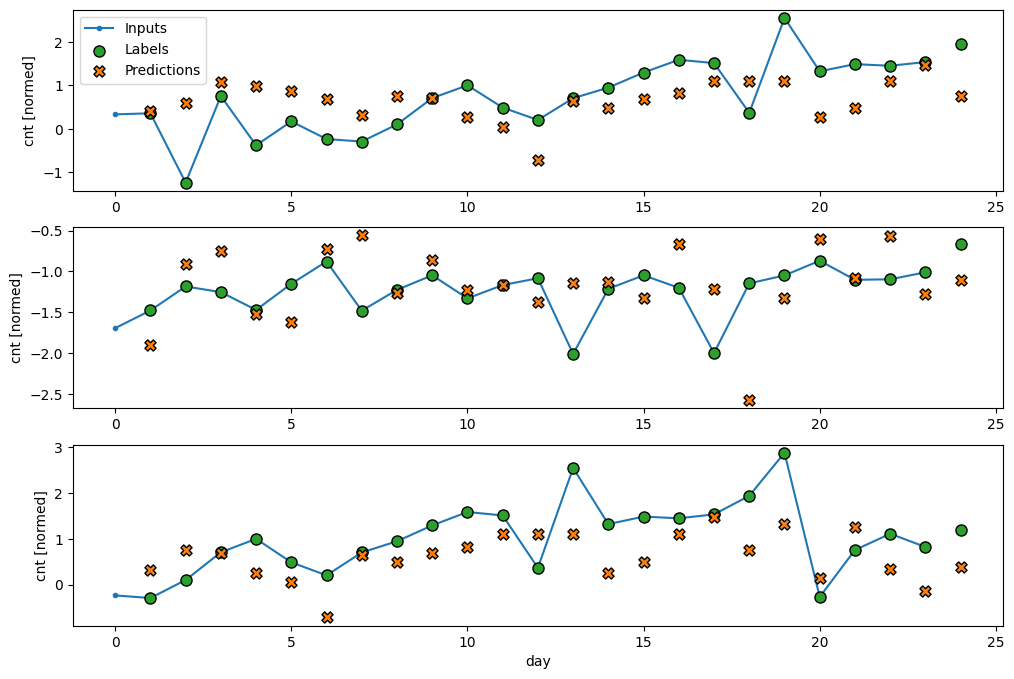

In [37]:
wide_window.plot(linear)

Одним из преимуществ линейных моделей является то, что их относительно просто интерпретировать. Можно вытащить веса слоя и визуализировать вес, назначенный каждому входу

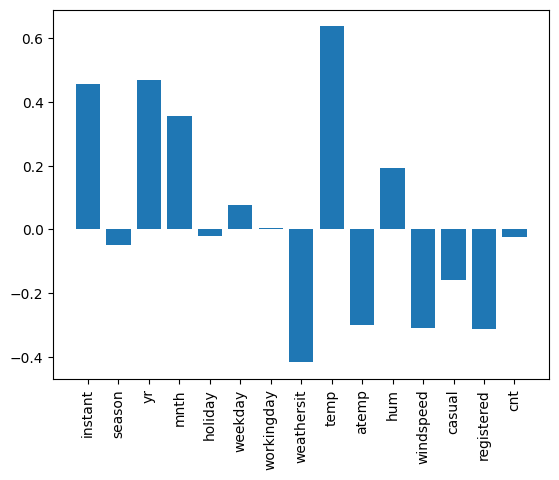

In [38]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense

 модель, похожая на linear модель, за исключением того, что между входом и выходом укладывается несколько Dense слоев

In [39]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
16/16 [==============================] - 2s 24ms/step - loss: 1.0524 - mean_absolute_error: 0.8101 - val_loss: 1.6188 - val_mean_absolute_error: 1.1330
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3793 - mean_absolute_error: 0.4721 - val_loss: 0.5464 - val_mean_absolute_error: 0.5607
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.3177 - mean_absolute_error: 0.4045 - val_loss: 0.4893 - val_mean_absolute_error: 0.5279
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.2949 - mean_absolute_error: 0.3868 - val_loss: 0.5391 - val_mean_absolute_error: 0.5942
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5065 - mean_absolute_error: 0.5590


In [40]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', dense(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


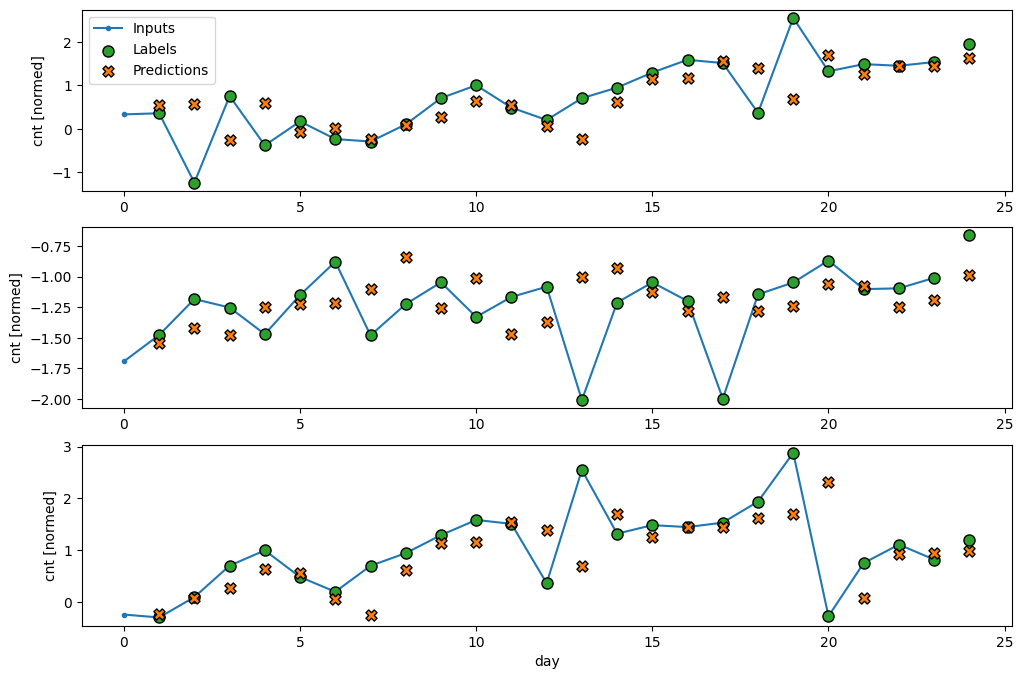

In [41]:
wide_window.plot(dense)

## Multi-step dense

Одношаговая модель не имеет контекста для текущих значений входных данных. Он не может видеть, как входные объекты меняются с течением времени. Чтобы решить эту проблему, модели требуется доступ к нескольким временным шагам при прогнозировании

baseline , linear и dense модели обрабатывали каждый временной шаг независимо. Здесь модель будет принимать несколько временных шагов в качестве входных данных для получения одного вывода

In [42]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['cnt'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['cnt']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

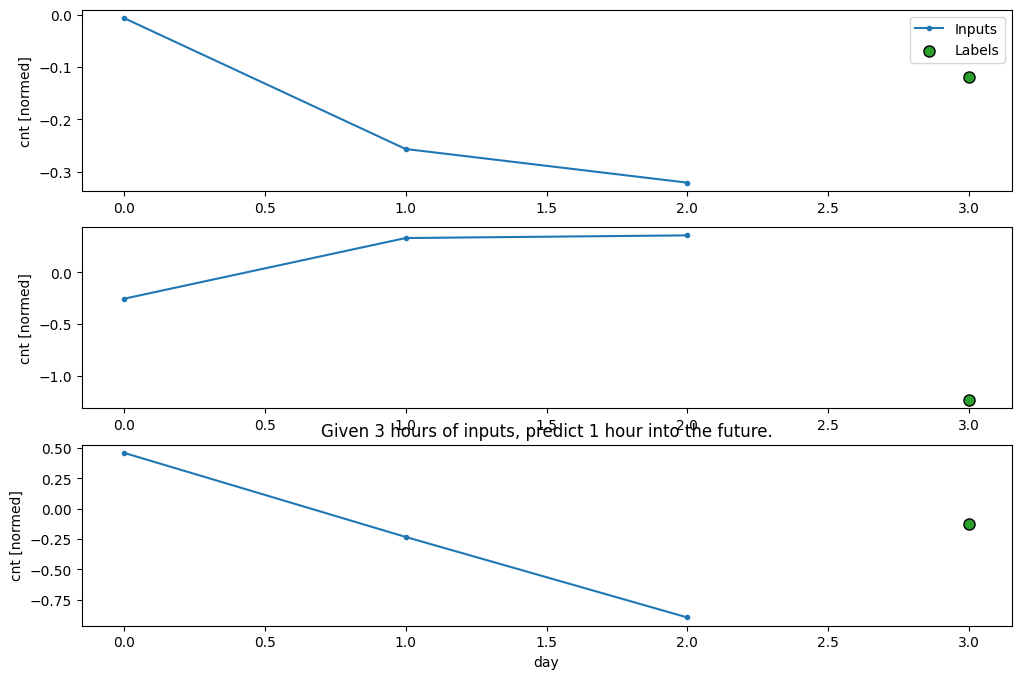

In [43]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

можно обучить dense модель в окне с несколькими входными шагами, добавив tf.keras.layers.Flatten в качестве первого слоя модели

In [44]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [45]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 15)
Output shape: (32, 1, 1)


In [46]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.5634 - mean_absolute_error: 0.6145


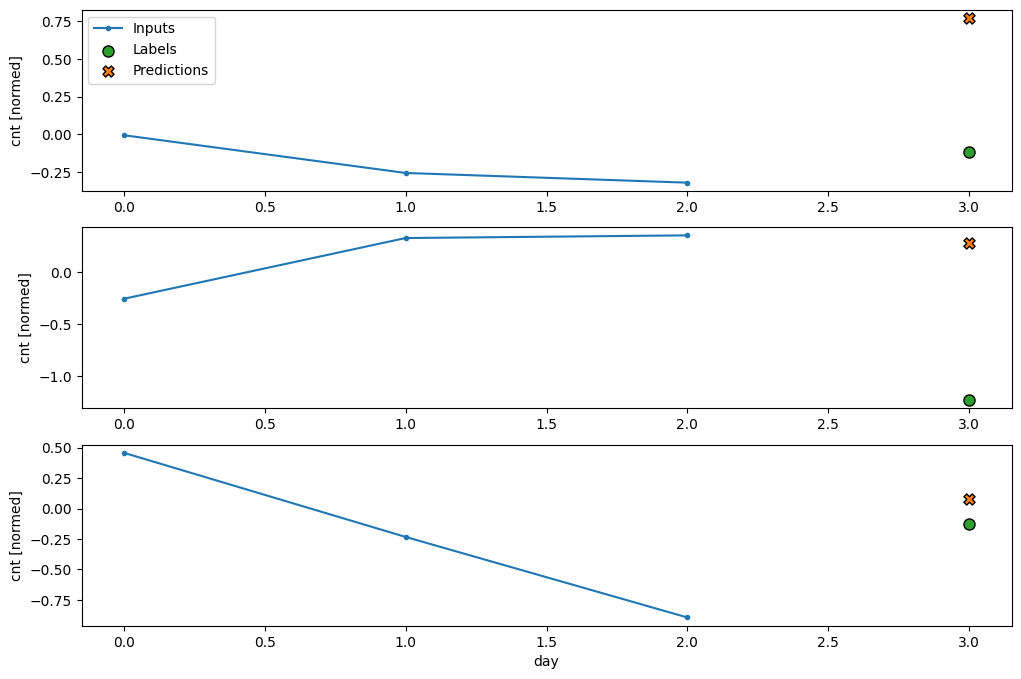

In [47]:
conv_window.plot(multi_step_dense)

## Convolution neural network (CNN)

Слой свертки ( tf.keras.layers.Conv1D ) также использует несколько временных шагов в качестве входных данных для каждого прогноза.

tf.keras.layers.Flatten и первый tf.keras.layers.Dense заменяются tf.keras.layers.Conv1D.

tf.keras.layers.Reshape больше не нужен, так как свертка сохраняет ось времени в своих выходных данных.

In [48]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [49]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 15)
Output shape: (32, 1, 1)


In [50]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.4368 - mean_absolute_error: 0.5105


Разница между этой conv_model и моделью multi_step_dense заключается в том, что conv_model можно запускать на входах любой длины. Сверточный слой применяется к скользящему окну входных данных

In [51]:
# вывод короче ввода
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 15)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


WindowGenerator для создания широких окон с несколькими дополнительными временными шагами ввода, чтобы длина метки и предсказания совпадала

In [52]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['cnt'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['cnt']

In [53]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 15)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


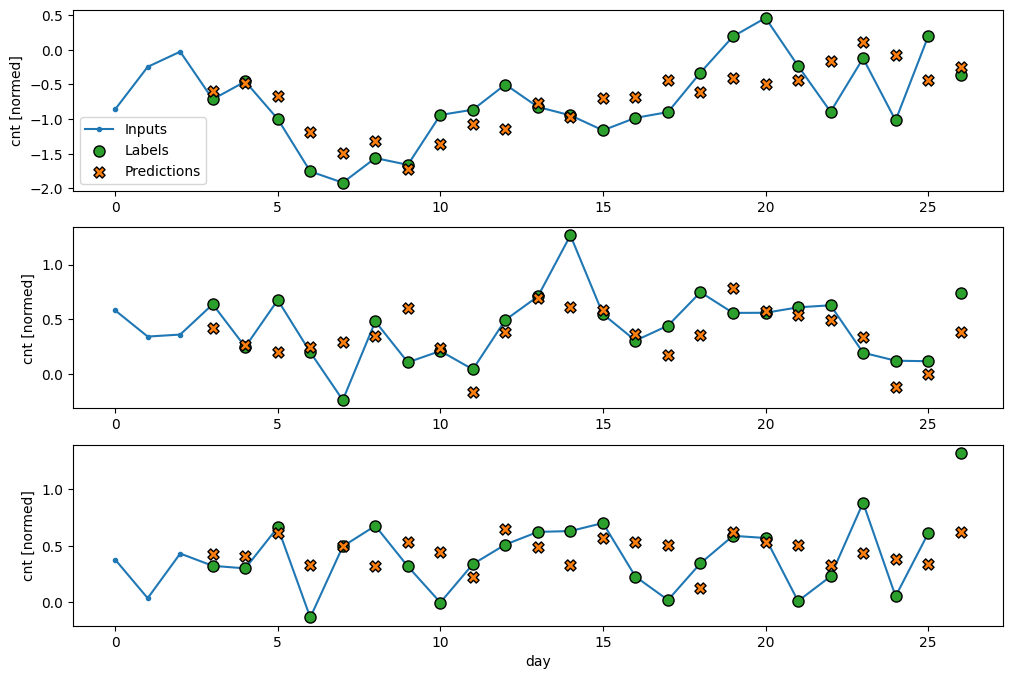

In [54]:
wide_conv_window.plot(conv_model)

## Recurrent neural network (RNN)

Рекуррентная нейронная сеть (RNN) — это тип нейронной сети, хорошо подходящий для данных временных рядов. RNN обрабатывают временной ряд шаг за шагом, сохраняя внутреннее состояние от шага к шагу.

В этом руководстве вы будете использовать слой RNN под названием Long Short-Term Memory ( tf.keras.layers.LSTM )

Важным аргументом конструктора для всех слоев Keras RNN, таких как tf.keras.layers.LSTM , является аргумент return_sequences . Этот параметр может настроить слой одним из двух способов:

Если False по умолчанию, слой возвращает только выходные данные последнего временного шага, давая модели время, чтобы прогреть свое внутреннее состояние, прежде чем делать один прогноз

Если True , слой возвращает результат для каждого входа

In [55]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [56]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


In [57]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

4/4 [==============================] - 0s 5ms/step - loss: 0.6072 - mean_absolute_error: 0.6525


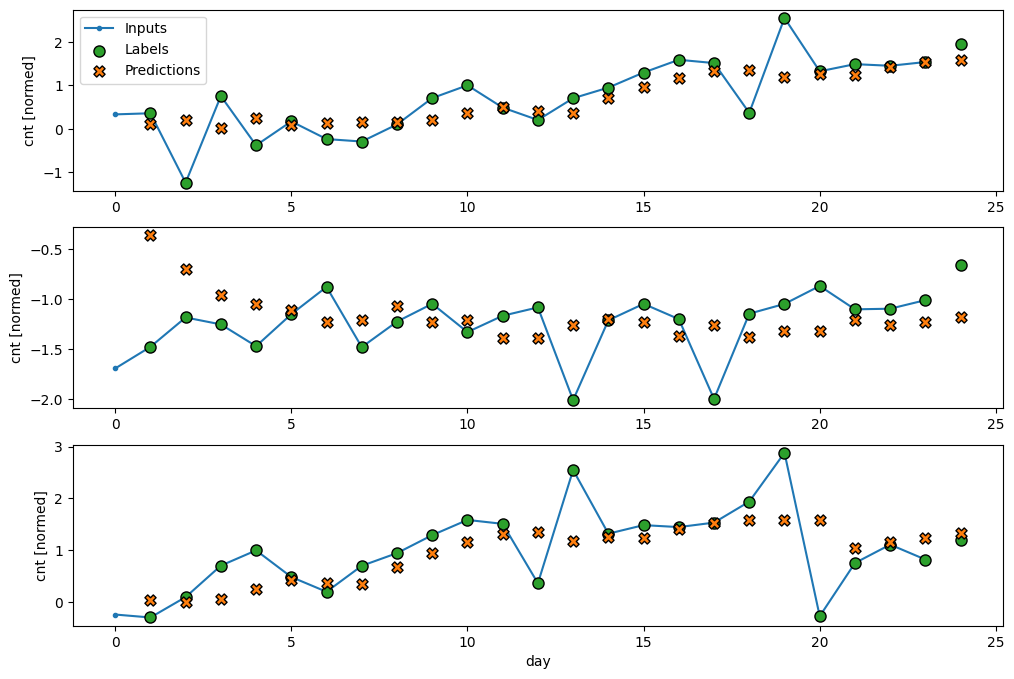

In [58]:
wide_window.plot(lstm_model)

## Performance

С этим набором данных обычно каждая из моделей работает немного лучше, чем предыдущая

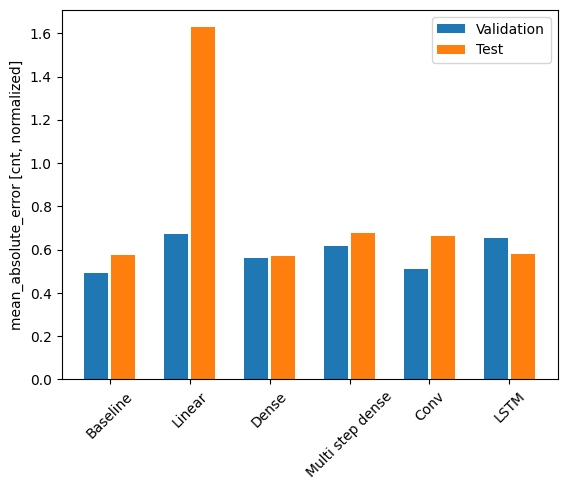

In [59]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [cnt, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [60]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5768
Linear      : 1.6270
Dense       : 0.5722
Multi step dense: 0.6751
Conv        : 0.6637
LSTM        : 0.5807


# Multi-output models

До сих пор все модели предсказывали одну выходную характеристику cnt для одного временного шага.

Все эти модели можно преобразовать для прогнозирования нескольких функций, просто изменив количество единиц в выходном слое и настроив окна обучения, чтобы включить все функции в labels ( example_labels )

In [61]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

#  ось features меток теперь имеет ту же глубину, что и входные данные, а не 1
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 15)
Labels shape (batch, time, features): (32, 24, 15)


### Baseline

Здесь можно использовать ту же базовую модель ( Baseline ), но на этот раз с повторением всех функций вместо выбора конкретного label_index

In [62]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [63]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

4/4 [==============================] - 0s 2ms/step - loss: 0.6282 - mean_absolute_error: 0.3898


### Dense


In [64]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.3684 - mean_absolute_error: 0.4245


### RNN

In [65]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

4/4 [==============================] - 0s 5ms/step - loss: 0.5852 - mean_absolute_error: 0.6118

CPU times: total: 20.7 s
Wall time: 10.8 s


### Advanced: Residual connections

Baseline модель, использованная ранее, использовала тот факт, что последовательность не сильно меняется от одного временного шага к другому

In [66]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [67]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

4/4 [==============================] - 0s 5ms/step - loss: 0.2999 - mean_absolute_error: 0.3151

CPU times: total: 22.1 s
Wall time: 10.9 s


### Performance-2

общая производительность для этих моделей с несколькими выходами

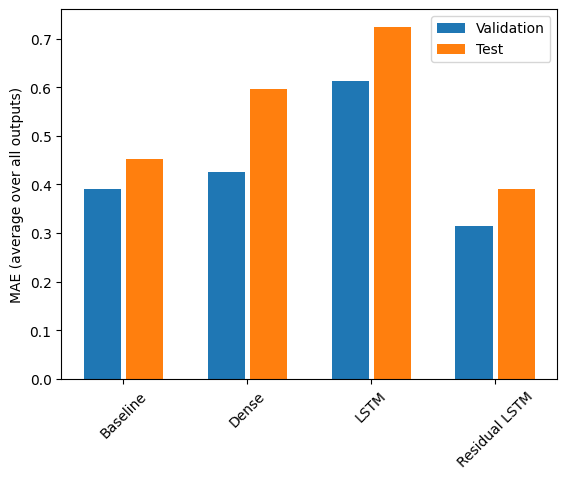

In [68]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [69]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.4520
Dense          : 0.5972
LSTM           : 0.7245
Residual LSTM  : 0.3911


# Multi-step models

Как модели с одним выходом, так и модели с несколькими выходами в предыдущих разделах делали прогнозы с одним временным шагом , на один час вперед.

В этом разделе рассматривается, как расширить эти модели, чтобы делать прогнозы с несколькими временными шагами .

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

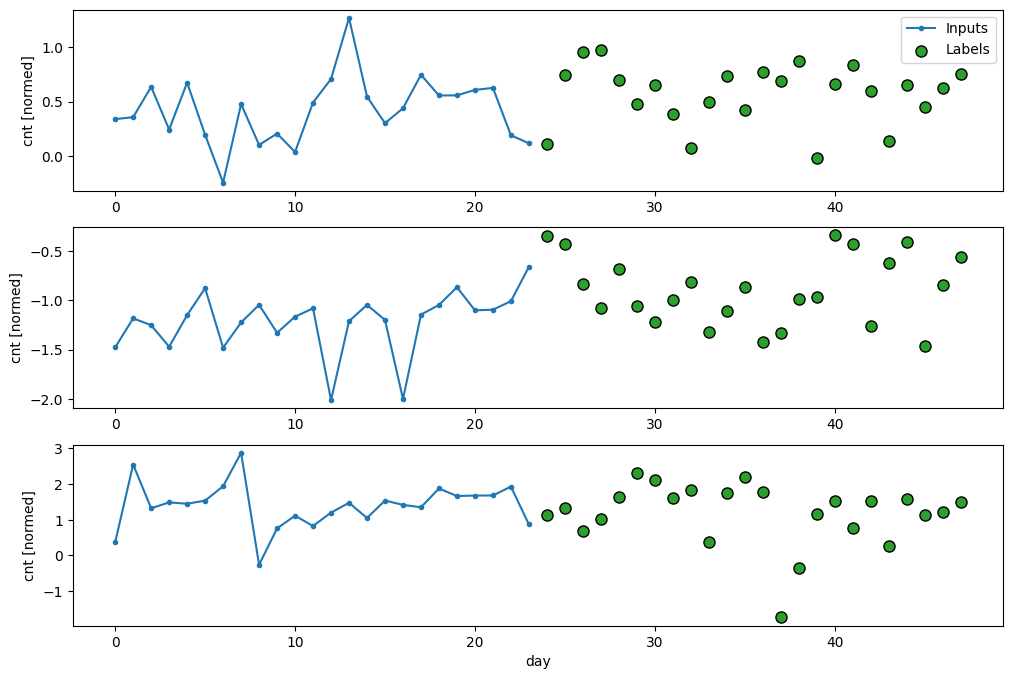

In [70]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines

Baselines для этой задачи — повторить последний временной шаг ввода для необходимого количества выходных временных шагов

4/4 [==============================] - 0s 2ms/step - loss: 0.9108 - mean_absolute_error: 0.5547


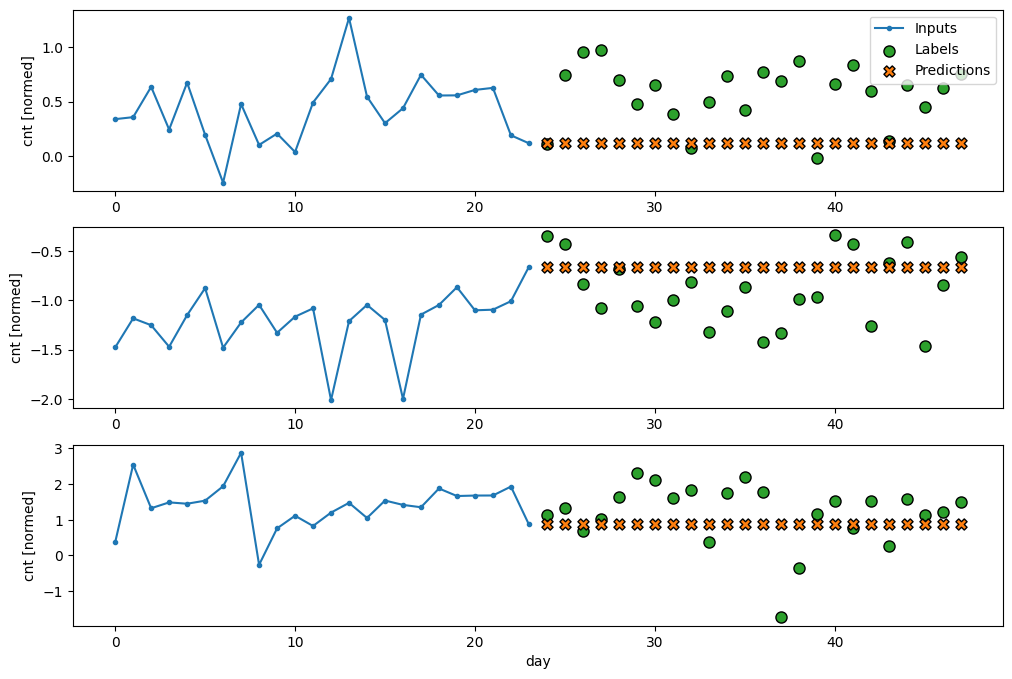

In [71]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

другой простой подход состоит в том, чтобы повторить предыдущие дени, предполагая, что следующие будут похоже

4/4 [==============================] - 0s 3ms/step - loss: 1.1237 - mean_absolute_error: 0.6794


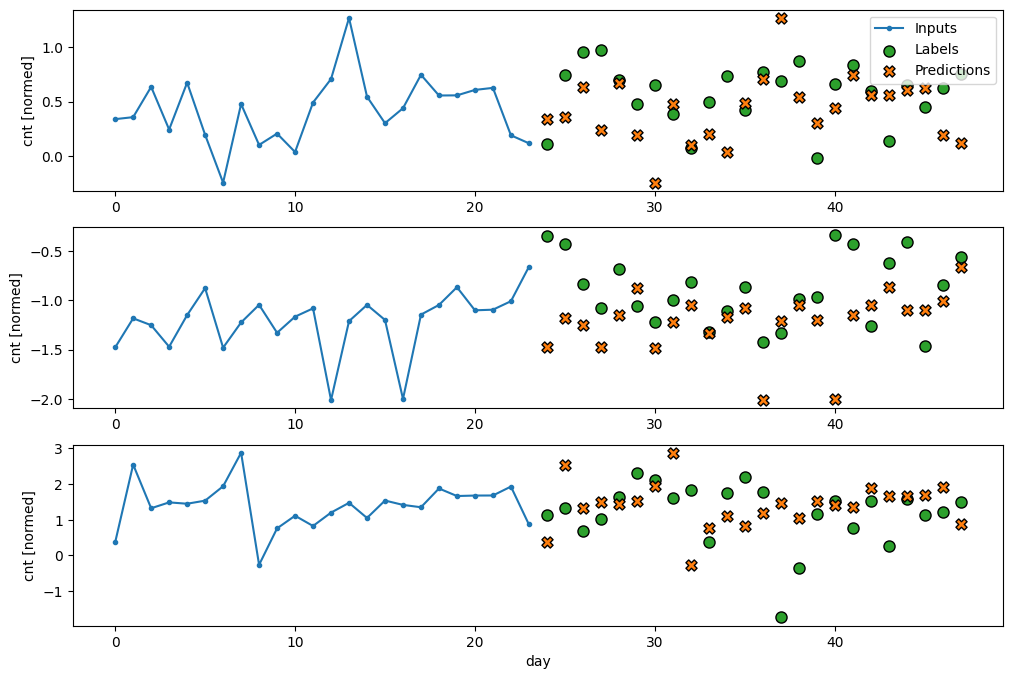

In [72]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

## Single-shot models

Одним из высокоуровневых подходов к этой проблеме является использование «однократной» модели, в которой модель делает прогноз всей последовательности за один шаг

Это может быть эффективно реализовано как tf.keras.layers.Dense с выходными единицами OUT_STEPS*features . Модель просто должна преобразовать этот вывод в требуемый (OUTPUT_STEPS, features)

### Linear

Простая линейная модель, основанная на последнем входном временном шаге, работает лучше любой BaseLine, но у нее недостаточно мощности. Модель должна прогнозировать временные шаги OUTPUT_STEPS на основе одного входного временного шага с линейной проекцией. Он может зафиксировать только низкоразмерный фрагмент поведения, вероятно, основанный в основном на времени суток и времени года

4/4 [==============================] - 0s 3ms/step - loss: 0.5508 - mean_absolute_error: 0.5736


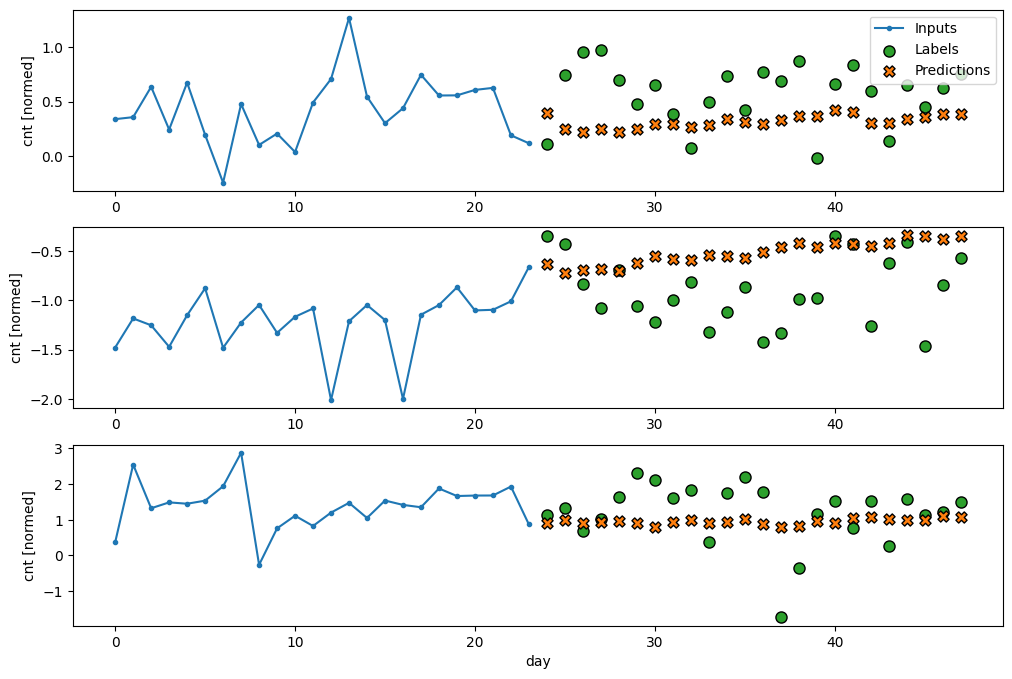

In [73]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense-2

Добавление tf.keras.layers.Dense между входом и выходом делает линейную модель более мощной, но по-прежнему основано только на одном временном шаге ввода.

4/4 [==============================] - 0s 3ms/step - loss: 0.4969 - mean_absolute_error: 0.5387


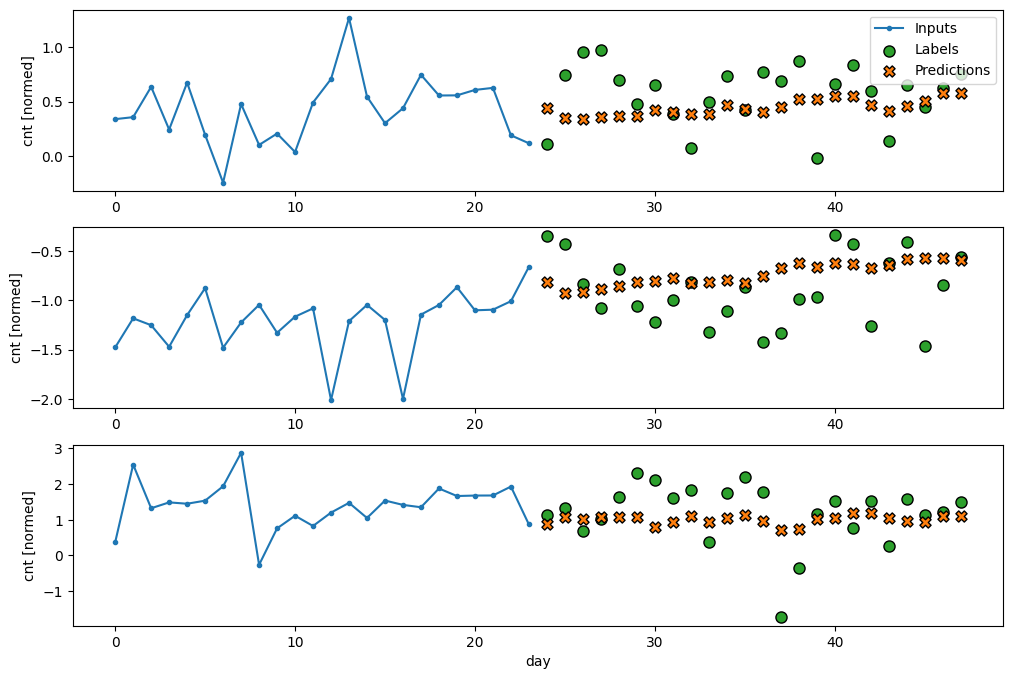

In [74]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

Сверточная модель делает прогнозы на основе истории фиксированной ширины, что может привести к более высокой производительности, чем плотная модель, поскольку она может видеть, как все меняется с течением времени:

4/4 [==============================] - 0s 3ms/step - loss: 0.4995 - mean_absolute_error: 0.5363


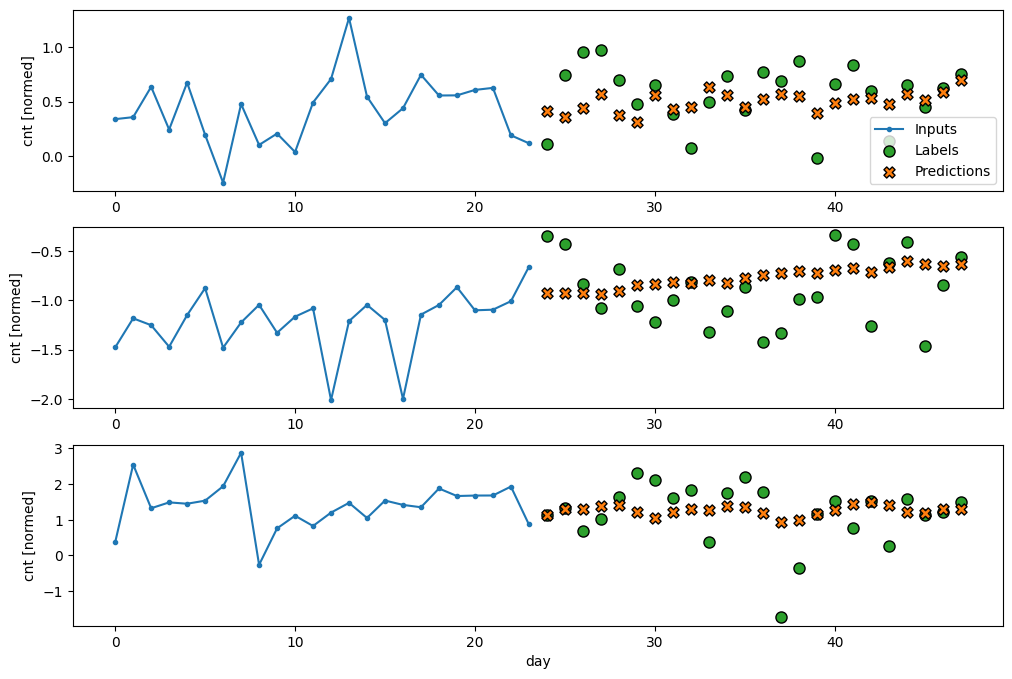

In [75]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN-2

Рекуррентная модель может научиться использовать длинную историю входных данных, если она имеет отношение к прогнозам, которые делает модель. Здесь модель будет накапливать внутреннее состояние за 24 дня, прежде чем сделать один прогноз на следующие 24 дня.

4/4 [==============================] - 0s 7ms/step - loss: 0.8831 - mean_absolute_error: 0.7802


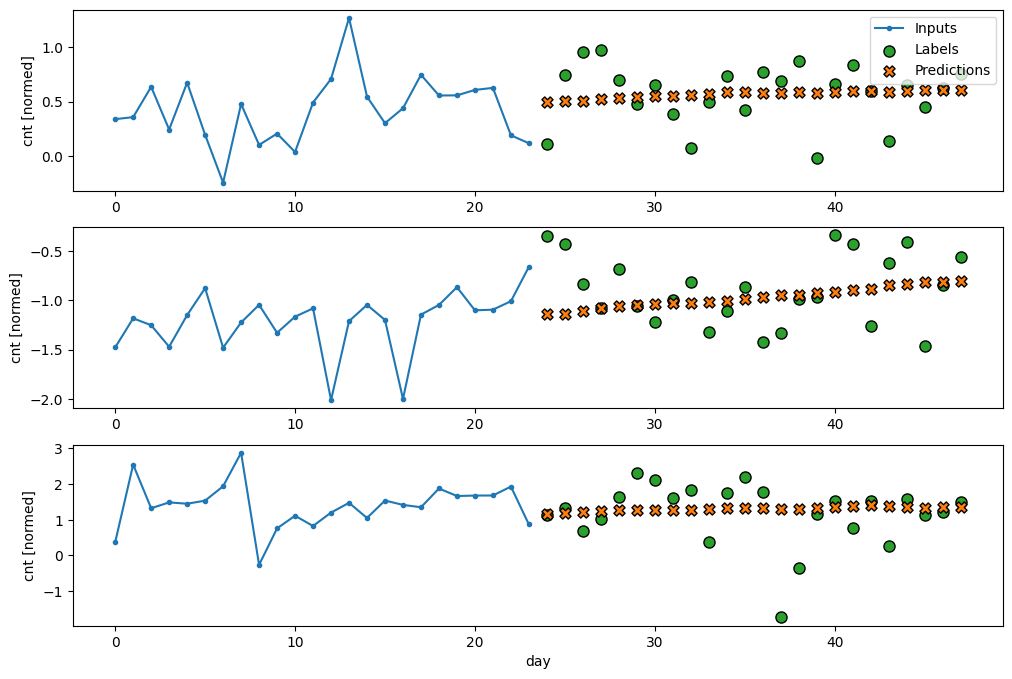

In [76]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## Advanced: Autoregressive model

Все вышеперечисленные модели предсказывают всю выходную последовательность за один шаг.

В некоторых случаях для модели может быть полезно разложить этот прогноз на отдельные временные шаги. Затем выходные данные каждой модели могут быть возвращены в себя на каждом шаге, и прогнозы могут быть сделаны в зависимости от предыдущего, как в классическом Генерация последовательностей с рекуррентными нейронными сетями

### RNN-3

В этом руководстве строится только авторегрессионная модель RNN, но этот шаблон можно применить к любой модели, предназначенной для вывода одного временного шага.

Модель будет иметь ту же базовую форму, что и одноэтапные модели LSTM из более ранних версий: слой tf.keras.layers.LSTM , за которым следует слой tf.keras.layers.Dense , который преобразует выходные данные слоя LSTM в прогнозы модели.

tf.keras.layers.LSTM — это tf.keras.layers.LSTMCell , обернутый в tf.keras.layers.RNN более высокого уровня, который управляет для вас результатами состояния и последовательности (ознакомьтесь с рекуррентными нейронными сетями (RNN) с Keras). руководство для получения подробной информации).

В этом случае модель должна вручную управлять входными данными для каждого шага, поэтому она использует tf.keras.layers.LSTMCell непосредственно для интерфейса нижнего уровня с одним временным шагом.

In [77]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [78]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [79]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [80]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 15])

In [81]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [82]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 15)


4/4 [==============================] - 0s 7ms/step - loss: 0.9263 - mean_absolute_error: 0.7822


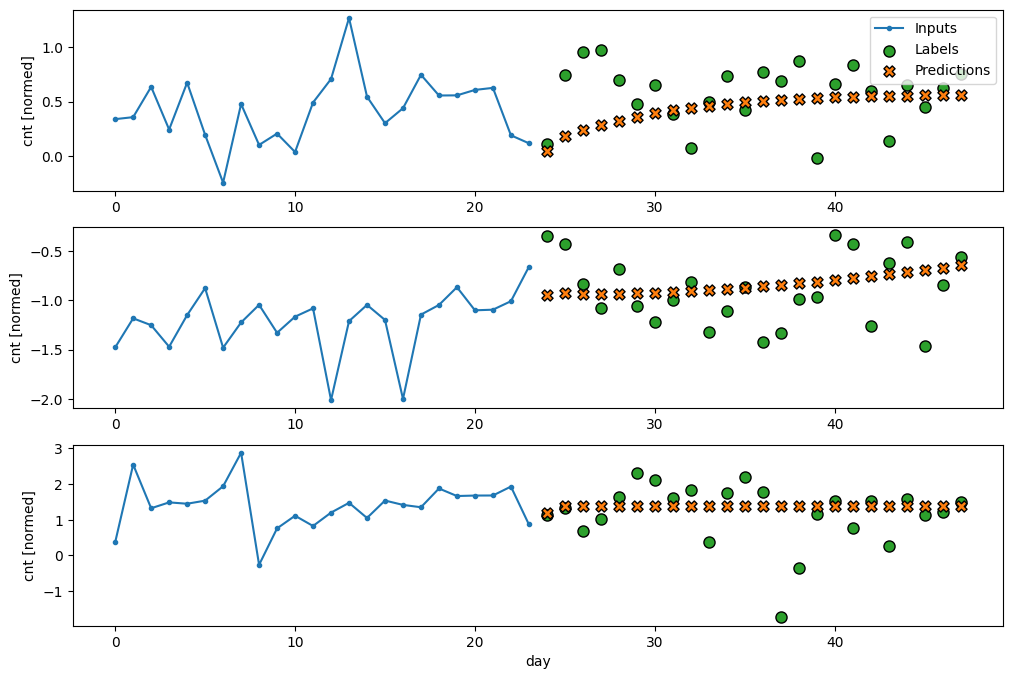

In [83]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Performance-3

В этой проблеме явно наблюдается уменьшение отдачи в зависимости от сложности модели

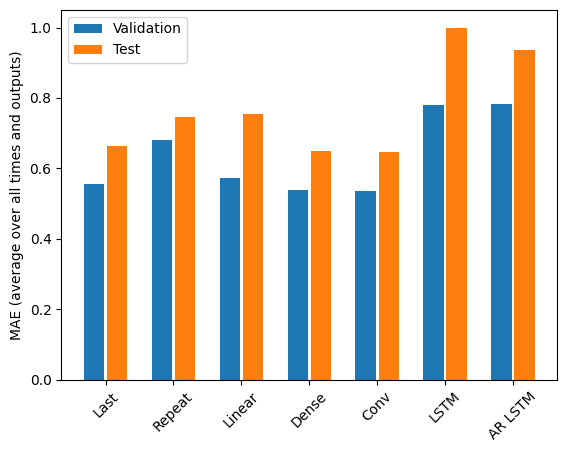

In [85]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [86]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.6626
Repeat  : 0.7465
Linear  : 0.7544
Dense   : 0.6484
Conv    : 0.6463
LSTM    : 1.0000
AR LSTM : 0.9374
